<a href="https://colab.research.google.com/github/Ashwin-Rajesh/IEEE-Computer-Vision/blob/main/IEEE_Computer_Vision_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello there!

This is colaboratory. It uses something called "jupyter notebooks", which is a better way to write and run python code.

There are **text cells** and **code cells**. Text cells use "markdown" (same format used in github readmes) for storing and displaying text. Code cells have code that can be run cell-by-cell.

The following is such a "cell".

In [1]:
print("Hello there!")

Hello there!


---
# Libraries

We use the following libraries

- cv2
  - OpenCV for computer vision
- numpy
  - For representing matrices
- matplotlib
  - For showing images
- ipywidgets
  - For widgets, like sliders and numeric entry fields

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual

We can also execute linux commands using "!" prefix. Here we download some files from the github repository

In [51]:
!wget -O hills.jpg https://raw.githubusercontent.com/Ashwin-Rajesh/IEEE-Computer-Vision/main/samples/hills.jpg
!wget -O gect.jpg https://raw.githubusercontent.com/Ashwin-Rajesh/IEEE-Computer-Vision/main/samples/gect.jpg
!wget -O newspaper.jpg https://raw.githubusercontent.com/Ashwin-Rajesh/IEEE-Computer-Vision/main/samples/newspaper.jpg
!wget -O textbook.jpg https://raw.githubusercontent.com/Ashwin-Rajesh/IEEE-Computer-Vision/main/samples/textbook.jpg
!wget -O face.jpg https://raw.githubusercontent.com/Ashwin-Rajesh/IEEE-Computer-Vision/main/samples/face.jpg
!wget -O face.jpg https://raw.githubusercontent.com/Ashwin-Rajesh/IEEE-Computer-Vision/main/samples/numberplate.jpg

--2022-03-04 14:49:50--  https://raw.githubusercontent.com/Ashwin-Rajesh/IEEE-Computer-Vision/main/samples/hills.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52975 (52K) [image/jpeg]
Saving to: ‘hills.jpg’

hills.jpg           100%[===================>]  51.73K  --.-KB/s    in 0.01s   

2022-03-04 14:49:50 (4.04 MB/s) - ‘hills.jpg’ saved [52975/52975]

--2022-03-04 14:49:50--  https://raw.githubusercontent.com/Ashwin-Rajesh/IEEE-Computer-Vision/main/samples/gect.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145613 (14

---
## Basic image manipulations

First, read image using cv2.imread(). It returns a numpy matrix

In [4]:
# Image is read as a numpy array
filename = "face.jpg"                # Options : hills, gect, face, newspaper, textbook
img = cv2.imread(filename);

# Show type of image and its size
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(640, 427, 3)


The returned size is in (height, width, color channels). We can see that the returned value has 3 color channels and is 340 pixels high and 544 pixels wide

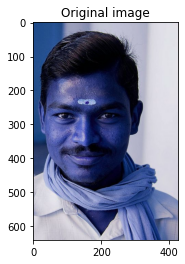

In [5]:
# Show image using matplotlib
plt.imshow(img)
plt.title("Original image")
plt.show()

That doesnt look right! Thats because the image used BGR color space (blue, green, red) while matplotlib uses RGB (Red, Green, Blue). This is a very common issue! We need to change the colorspace using cv2.cvtColor()

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

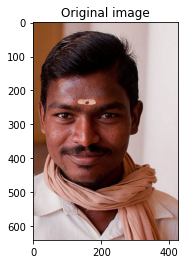

In [7]:
plt.imshow(img)
plt.title("Original image")
plt.show()

We can view the individual components separately

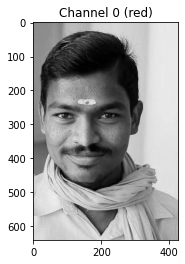

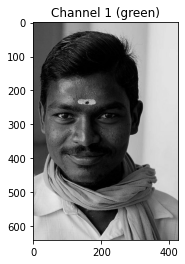

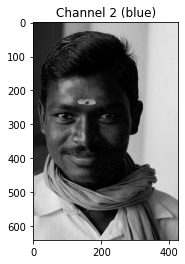

In [8]:
# Show channel 0 (red)
plt.imshow(img[:, :, 0], cmap='gray')
plt.title("Channel 0 (red)")
plt.show()

# Show channel 1 (green)
plt.imshow(img[:, :, 1], cmap='gray')
plt.title("Channel 1 (green)")
plt.show()

# Show channel 2 (blue)
plt.imshow(img[:, :, 2], cmap='gray')
plt.title("Channel 2 (blue)")
plt.show()

Lets also see why HSV is more "intuitive".

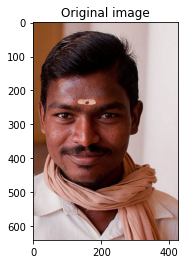

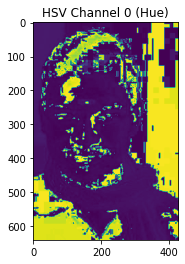

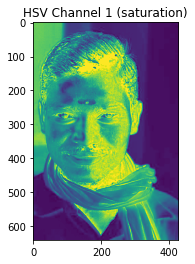

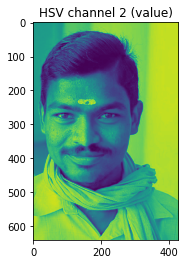

In [9]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title("Original image")
plt.show()

# Show channel 0 (red)
plt.imshow(img_hsv[:, :, 0])
plt.title("HSV Channel 0 (Hue)")
plt.show()

# Show channel 1 (green)
plt.imshow(img_hsv[:, :, 1])
plt.title("HSV Channel 1 (saturation)")
plt.show()

# Show channel 2 (blue)
plt.imshow(img_hsv[:, :, 2])
plt.title("HSV channel 2 (value)")
plt.show()

cvtColor can also be used to get grayscale version of images. We can see grayscale is very similar to HSV value

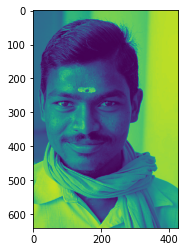

In [10]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(img_gray)
plt.show()

(Go back to presentation)

---
## Thresholding


In [11]:
def show_thresh(img, thresh):
  ret, thresh_bin        = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
  ret, thresh_bin_inv    = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY_INV)
  ret, thresh_bin_trunc  = cv2.threshold(img, thresh, 255, cv2.THRESH_TRUNC)
  ret, thresh_tozero     = cv2.threshold(img, thresh, 255, cv2.THRESH_TOZERO)
  ret, thresh_tozero_inv = cv2.threshold(img, thresh, 255, cv2.THRESH_TOZERO_INV)

  plt.imshow(img, cmap="gray")
  plt.title("Original")
  plt.show()

  plt.imshow(thresh_bin, cmap="gray")
  plt.title("Binary")
  plt.show()

  plt.imshow(thresh_bin_inv, cmap="gray")
  plt.title("Binary inverted")
  plt.show()

  plt.imshow(thresh_bin_trunc, cmap="gray")
  plt.title("Truncated")
  plt.show()

  plt.imshow(thresh_tozero, cmap="gray")
  plt.title("To Zero")
  plt.show()

  plt.imshow(thresh_tozero_inv, cmap="gray")
  plt.title("To Zero Inverted")
  plt.show()

In [12]:
interact(lambda x : show_thresh(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), x), x=100)

interactive(children=(IntSlider(value=100, description='x', max=300, min=-100), Output()), _dom_classes=('widg…

<function __main__.<lambda>>

In [13]:
def show_adaptive_thresh(img, thresh):
  thresh_ad_mean  = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, thresh)
  thresh_ad_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, thresh)

  plt.imshow(img, cmap="gray")
  plt.title("Original")
  plt.show()

  plt.imshow(thresh_ad_mean, cmap="gray")
  plt.title("Mean adaptive")
  plt.show()

  plt.imshow(thresh_ad_gauss, cmap="gray")
  plt.title("Gaussian adaptive")
  plt.show()

In [14]:
interact(lambda x : show_adaptive_thresh(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), x), x=2)

interactive(children=(IntSlider(value=2, description='x', max=6, min=-2), Output()), _dom_classes=('widget-int…

<function __main__.<lambda>>

---
# Noise and smoothing

Noise can occur in digital images. One of them is salt and pepper noise, which involves random black and white pixels in the image

In [20]:
def add_noise(img, num_white_px = 1000, num_black_px = 1000):
  row = img.shape[0]
  col = img.shape[1]

  ret_img = img.copy();
  for i in range(num_white_px):
    ret_img[np.random.randint(0, row-1), np.random.randint(0, col-1)] = 0
  
  for i in range(num_black_px):
    ret_img[np.random.randint(0, row-1), np.random.randint(0, col-1)] = 255

  return ret_img

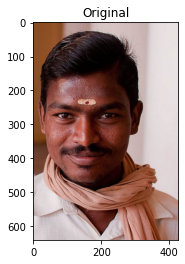

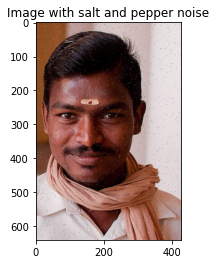

In [21]:
plt.imshow(img)
plt.title("Original")
plt.show()

plt.imshow(add_noise(img))
plt.title("Image with salt and pepper noise")
plt.show()

In [22]:
def show_blur(img, kernel_size):
  img_blur        = cv2.blur(img, (kernel_size, kernel_size))
  img_gauss_blur  = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
  img_med_blur    = cv2.medianBlur(img, kernel_size)

  plt.imshow(img)
  plt.title("Original")
  plt.show()

  plt.imshow(img_blur)
  plt.title("Normal blur")
  plt.show()

  plt.imshow(img_gauss_blur)
  plt.title("Gaussian blur")
  plt.show()
  
  plt.imshow(img_med_blur)
  plt.title("Meidan blur")
  plt.show()


In [18]:
interact(lambda x : show_blur(add_noise(img), x), x=(1, 15, 2))

interactive(children=(IntSlider(value=7, description='x', max=15, min=1, step=2), Output()), _dom_classes=('wi…

<function __main__.<lambda>>

---
## Edge detection

Sobel filters for edge detection

In [46]:
def show_sobel(img, ksize):
  x_edges     = cv2.Sobel(img, ddepth=cv2.CV_16S, dx=1, dy=0, ksize=3)
  y_edges     = cv2.Sobel(img, ddepth=cv2.CV_16S, dx=0, dy=1, ksize=3)

  plt.imshow(img, cmap="gray")
  plt.title("Original")
  plt.show()

  plt.imshow(x_edges, cmap="gray")
  plt.title("Horizontal edges")
  plt.show()

  plt.imshow(y_edges,cmap="gray")
  plt.title("Vertical edges")
  plt.show()

In [47]:
interact(lambda x : show_sobel(img_gray, x), x=(1, 15, 2))

interactive(children=(IntSlider(value=7, description='x', max=15, min=1, step=2), Output()), _dom_classes=('wi…

<function __main__.<lambda>>

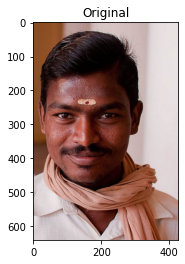

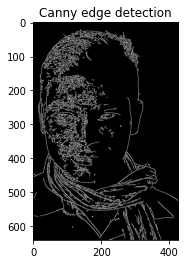

In [50]:
img_canny = cv2.Canny(img, 100, 200)

plt.imshow(img)
plt.title("Original")
plt.show()

plt.imshow(img_canny, cmap="gray")
plt.title("Canny edge detection")
plt.show()